# Endometrial Proteomics Power Analysis

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt
import seaborn as sns

import cptac
import cptac.algorithms as al


en = cptac.Endometrial()

Checking that index is up-to-date...Loading acetylproteomics data...Loading clinical data...Loading CNA data...Loading definitions data...Loading miRNA data...Loading phosphoproteomics_gene data...Loading phosphoproteomics_site data...Loading proteomics data...Loading somatic_binary data...Loading somatic data...Loading transcriptomics_circular data...Loading transcriptomics_linear data...Formatting dataframes...

### Get Proteomics Data

In [2]:
proteomics = en.get_proteomics()

### Append Clinical Data, Select Histologic Type

In [3]:
all_genes = list(proteomics.columns)
clin_df = en.join_metadata_to_omics(metadata_df_name="clinical", omics_df_name="proteomics", metadata_cols=["Histologic_type"])
clin_df.head()

,Histologic_type,A1BG_proteomics,A2M_proteomics,A2ML1_proteomics,A4GALT_proteomics,AAAS_proteomics,AACS_proteomics,AADAT_proteomics,AAED1_proteomics,AAGAB_proteomics,...,ZSWIM8_proteomics,ZSWIM9_proteomics,ZW10_proteomics,ZWILCH_proteomics,ZWINT_proteomics,ZXDC_proteomics,ZYG11B_proteomics,ZYX_proteomics,ZZEF1_proteomics,ZZZ3_proteomics
Sample_ID,,,,,,,,,,,,,,,,,,,,,
S001,Endometrioid,-1.180,-0.8630,-0.802,0.222,0.2560,0.6650,1.2800,-0.3390,0.412,...,-0.08770,NaN,0.0229,0.1090,NaN,-0.332,-0.43300,-1.020,-0.1230,-0.0859
S002,Endometrioid,-0.685,-1.0700,-0.684,0.984,0.1350,0.3340,1.3000,0.1390,1.330,...,-0.03560,NaN,0.3630,1.0700,0.737,-0.564,-0.00461,-1.130,-0.0757,-0.4730
S003,Endometrioid,-0.528,-1.3200,0.435,NaN,-0.2400,1.0400,-0.0213,-0.0479,0.419,...,0.00112,-0.1450,0.0105,-0.1160,NaN,0.151,-0.07400,-0.540,0.3200,-0.4190
S005,Endometrioid,-1.670,-1.1900,-0.443,0.243,-0.0993,0.7570,0.7400,-0.9290,0.229,...,0.07250,-0.0552,-0.0714,0.0933,0.156,-0.398,-0.07520,-0.797,-0.0301,-0.4670
S006,Serous,-0.374,-0.0206,-0.537,0.311,0.3750,0.0131,-1.1000,NaN,0.565,...,-0.17600,NaN,-1.2200,-0.5620,0.937,-0.646,0.20700,-1.850,-0.1760,0.0513


### Select only 'Endometrioid' Histologic Type

In [4]:
endometrioid_df = clin_df.loc[clin_df['Histologic_type'] == 'Endometrioid']

print(len(endometrioid_df))

endometrioid_df = endometrioid_df.drop("Histologic_type", axis = 1)

endometrioid_df = endometrioid_df.loc[:,~endometrioid_df.columns.duplicated()]


83


### Calculate and store, in a dictionary, the variance for each protein

In [5]:
variance_dict = {}
for protein in endometrioid_df:
    prot_vals = endometrioid_df[protein].dropna()
    variance = np.var(prot_vals)
    #print(variance, "\n")
    if protein not in variance_dict.keys():
        variance_dict[protein] = variance
    else:
        print("REPEAT VAL")

### Print variance for each protein

In [6]:
for key, val in variance_dict.items():
    print(key, ": ", val, "\n")

A1BG_proteomics :  0.34075943433299455 

A2M_proteomics :  0.48049778097671647 

A2ML1_proteomics :  1.5386005044173394 

A4GALT_proteomics :  0.5152592239102392 

AAAS_proteomics :  0.05509122903636611 

AACS_proteomics :  0.29609425130915956 

AADAT_proteomics :  0.3192562878713346 

AAED1_proteomics :  0.21029103914608804 

AAGAB_proteomics :  0.13616536728962111 

AAK1_proteomics :  0.08834805155166206 

AAMDC_proteomics :  0.22184422348013236 

AAMP_proteomics :  0.12428801740185803 

AAR2_proteomics :  0.06227151943977097 

AARS_proteomics :  0.0707222749600813 

AARS2_proteomics :  0.09273350646392077 

AARSD1_proteomics :  0.1933952229257948 

AASDHPPT_proteomics :  0.04756001430631442 

AASS_proteomics :  0.4632990134686311 

AATF_proteomics :  0.11678220727545367 

ABAT_proteomics :  0.5299769976251997 

ABCA8_proteomics :  0.4742329560372743 

ABCB1_proteomics :  0.42242125614794573 

ABCB10_proteomics :  0.23171403681858038 

ABCB6_proteomics :  0.29240627396812313 

ABCB7_

ADGRL4_proteomics :  0.21482122805383602 

ADH1A_proteomics :  1.9521065831416662 

ADH1B_proteomics :  2.6983183184154678 

ADH1C_proteomics :  1.8006856226709242 

ADH4_proteomics :  0.5730086698194802 

ADH5_proteomics :  0.20288230716205544 

ADH6_proteomics :  1.3204180576613584 

ADH7_proteomics :  1.783332202619859 

ADHFE1_proteomics :  0.4032043936000001 

ADI1_proteomics :  0.23255272454266226 

ADIPOQ_proteomics :  1.1738869955697486 

ADIPOR1_proteomics :  0.3037776795555555 

ADIRF_proteomics :  0.9826119907957908 

ADK_proteomics :  0.1338129015577297 

ADM_proteomics :  1.207063238143962 

ADNP_proteomics :  0.0455628907224796 

ADO_proteomics :  0.09786972029748874 

ADPGK_proteomics :  0.09429553918118742 

ADPRH_proteomics :  0.2182922513439396 

ADPRHL2_proteomics :  0.07535881891676584 

ADPRM_proteomics :  0.15746326858223064 

ADRA2A_proteomics :  0.47508132441855994 

ADRM1_proteomics :  0.07637641444891859 

ADSL_proteomics :  0.12541055757584563 

ADSS_proteomi

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




ARHGAP25_proteomics :  0.26447976355778785 

ARHGAP26_proteomics :  0.25342020886343447 

ARHGAP27_proteomics :  0.20019689428364051 

ARHGAP28_proteomics :  0.14011499894097224 

ARHGAP29_proteomics :  0.35751376248465666 

ARHGAP30_proteomics :  0.37086038830123386 

ARHGAP31_proteomics :  0.12331570436638117 

ARHGAP32_proteomics :  0.08431122171287564 

ARHGAP35_proteomics :  0.08577916275253304 

ARHGAP39_proteomics :  0.2670120906053128 

ARHGAP4_proteomics :  0.2776933841352589 

ARHGAP42_proteomics :  0.1287244497218119 

ARHGAP44_proteomics :  0.5960232103221095 

ARHGAP45_proteomics :  0.2549839004938017 

ARHGAP5_proteomics :  0.05382752715598783 

ARHGAP6_proteomics :  0.6659333524865726 

ARHGAP9_proteomics :  0.2263810384368124 

ARHGDIA_proteomics :  0.1771041230592539 

ARHGDIB_proteomics :  0.4284351757143562 

ARHGEF1_proteomics :  0.08108001332846568 

ARHGEF10_proteomics :  0.21726749387185373 

ARHGEF10L_proteomics :  0.23366140975089653 

ARHGEF11_proteomics :  0

B9D2_proteomics :  0.2699103624608318 

BABAM1_proteomics :  0.028170988694644794 

BABAM2_proteomics :  0.04442539312164319 

BACE2_proteomics :  0.3394312283274005 

BACH1_proteomics :  0.06732782761253334 

BAD_proteomics :  0.22961301588506325 

BAG1_proteomics :  0.10838759123377094 

BAG2_proteomics :  0.6698707451328206 

BAG3_proteomics :  0.30387917138626785 

BAG4_proteomics :  0.1612926652041225 

BAG5_proteomics :  0.09450704669899844 

BAG6_proteomics :  0.039969133576926684 

BAHD1_proteomics :  0.06415003999422034 

BAIAP2_proteomics :  0.531393065855712 

BAIAP2L1_proteomics :  0.2922016365165046 

BAIAP2L2_proteomics :  0.8761860402774234 

BAK1_proteomics :  0.2450925173367108 

BANF1_proteomics :  0.37646530529203087 

 0.3480280823457687 

BECN1_proteomics :  0.03201936417912011 

BEND3_proteomics :  0.1100946110420671 

BEND5_proteomics :  1.3908860069204152 

BEND7_proteomics :  0.3479784755709343 

BET1_proteomics :  0.7392815335839744 

BET1L_proteomics :  0.183

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





CD48_proteomics :  0.6102466011874543 

CD5_proteomics :  1.0806728421008907 

CD53_proteomics :  0.7887184721235558 

CD55_proteomics :  0.8722929489439982 

CD58_proteomics :  0.2500630226822761 

CD59_proteomics :  0.5467602164465092 

CD5L_proteomics :  0.5600775819596455 

CD63_proteomics 0.07494032605976687 

CDKL5_proteomics :  0.24987556786759196 

CDKN1A_proteomics :  0.4575223211862346 

CDKN1B_proteomics :  0.4341504415648136 

CDKN1C_proteomics :  0.23947388501531877 

CDKN2A_proteomics :  0.26141251146578603 

CDKN2AIP_proteomics :  0.05209243445727974 

CDKN2AIPNL_proteomics :  0.28863217787127304 

CDKN2C_proteomics :  0.4698389259253885 

CDKN3_proteomics :  0.29819153524816 

CDNF_proteomics :  0.10903082711538459 

CDPF1_proteomics :  0.10919880509724487 

CDR2_proteomics :  0.3219537643681442 

CDR2L_proteomics :  0.23785136023199296 

CDS1_proteomics :  1.0500738992364642 

CDS2_proteomics :  0.34985459115558454 

CDV3_proteomics :  0.09221119287034402 

CDYL_prot

COQ9_proteomics :  0.22731177018409057 

CORO1A_proteomics :  0.5139500504865149 

CORO1B_proteomics :  0.13972439461556102 

CORO1C_proteomics :  0.40464629663483803 

CORO2A_proteomics :  0.2756272320344026 

CORO2B_proteomics :  0.5820104504013937 

CORO6_proteomics :  0.42649940828402355 

CORO7_proteomics :  0.32597334832596897 

CORO7-PAM16_proteomics :  0.19390517087821166 

COTL1_proteomics :  0.2653479962232301 

COX11_proteomics :  0.30413262092044696 

COX14_proteomics :  0.3676319145756173 

COX15_proteomics :  0.6437459302390649 

COX16_proteomics :  0.4453912849057849 

COX17_proteomics :  0.2840792879069823 

COX18_proteomics :  0.3069238589560832 

COX19_proteomics :  0.1356551080330962 

COX20_proteomics :  0.4325944516294093 

COX4I1_proteomics :  0.49831591919114543 

COX5A_proteomics :  0.29534801954377743 

COX5B_proteomics :  0.42612666101405133 

COX6A1_proteomics :  0.6734487951749166 

COX6B1_proteomics :  0.22398373988030196 

COX6C_proteomics :  0.36226823984

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




DPT_proteomics :  0.9246558947116276 

DPY19L1_proteomics :  0.39696935150239515 

DPY19L3_proteomics :  0.515933394866098 

DPY19L4_proteomics :  0.24417174509374995 

DPY30_proteomics :  0.2052010221546462 

DPYD_proteomics :  0.41878308137610687 

DPYS_proteomics :  0.5670248603871106 

DPYSL2_proteomics :  0.30098224966691833 

DPYSL3_proteomics :  0.8668116588271159 

DPYSL4_proteomics :  0.44728673962258686 

DPYSL5_proteomics :  0.18515870489795913 

DR1_proteomics :  0.13401245859744523 

DRAP1_proteomics :  0.19707726267092465 

DRC1_proteomics :  0.6851888341666669 

DRG1_proteomics :  0.0676789528458122 

DRG2_proteomics :  0.034166603392950204 

DROSHA_proteomics :  0.06263654496983599 

DSC2_proteomics :  0.862926330447264 

DSC3_proteomics :  0.9063632399999999 

DSCC1_proteomics :  0.268932565047554 

DSG2_proteomics :  0.27928239441199015 

DSG3_proteomics :  2.0689702212320977 

DSG4_proteomics :  7.226423499999999 

DSN1_proteomics :  0.128818706931514 

DSP_proteomi

FAM92A_proteomics :  0.24244669912802408 

FAM92B_proteomics :  0.8987765594421486 

FAM98A_proteomics :  0.20768130933589782 

FAM98B_proteomics :  0.07894352505199592 

FAM98C_proteomics :  0.13163088435366313 

FANCD2_proteomics :  0.3271382890777942 

FANCI_proteomics :  0.345816977224561 

FAP_proteomics :  0.32394508671647554 

FAR1_proteomics :  0.24349444481262325 

FARP1_proteomics :  0.20970621305243148 

FARP2_proteomics :  0.1062428651832196 

FARS2_proteomics :  0.12064657912350121 

FARSA_proteomics :  0.051498773466924365 

FARSB_proteomics :  0.06789240368134708 

FAS_proteomics :  0.400046314809842 

FASN_proteomics :  0.3625267039197851 

FASTKD1_proteomics :  0.18079792422224047 

FASTKD2_proteomics :  0.10590504899706782 

FASTKD5_proteomics :  0.127561070442938 

FAT1_proteomics :  0.1422265223934969 

FAU_proteomics :  0.5806541205922483 

FBH1_proteomics :  0.03483453426633765 

FBL_proteomics :  0.09149665514202349 

FBLIM1_proteomics :  0.1630022552299608 

FBL

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



HDAC5_proteomics :  0.1933021279605167 

HDAC6_proteomics :  0.06164616288149224 

HDAC7_proteomics :  0.0603826801547406 

HDAC8_proteomics :  0.06058303982039589 

HDAC9_proteomics :  0.11398855492332367 

HDDC2_proteomics :  0.144208207403141 

HDDC3_proteomics :  0.21004803256948765 

HDGF_proteomics :  0.23731235989406285 

HDGFL1_proteomics :  0.12634336133333332 

HDGFL2_proteomics :  0.06831983510445641 

HDGFL3_proteomics :  0.7241266665730584 

HDHD2_proteomics :  0.15131267313323057 

HDHD3_proteomics :  0.179448108273102 

HDHD5_proteomics :  0.21314627378163714 

HDLBP_proteomics :  0.05619646237169401 

HEATR1_proteomics :  0.10904683149757702 

HEATR3_proteomics :  0.11104039241024823 

HEATR5A_proteomics :  0.10793434420480305 

HEATR5B_proteomics :  0.0493863397104079 

HEATR6_proteomics :  0.11351496595526203 

HEBP1_proteomics :  0.2161933925983162 

HEBP2_proteomics :  0.17643104552559144 

HECA_proteomics :  0.06333661843251565 

HECTD1_proteomics :  0.054864027157

INTS13_proteomics :  0.03698283225577006 

INTS14_proteomics :  0.08228636565304108 

INTS2_proteomics :  0.04140089509011467 

INTS3_proteomics :  0.05402861175023953 

INTS4_proteomics :  0.03436686529821454 

INTS5_proteomics :  0.03468730055746843 

INTS6_proteomics :  0.03847109257064888 

INTS6L_proteomics :  0.4562226928696378 

INTS7_proteomics :  0.04484818970262739 

INTS8_proteomics :  0.04826965270825956 

INTS9_proteomics :  0.07880508255994925 

IP6K1_proteomics :  0.044954154141036436 

IPCEF1_proteomics :  0.24828524825396825 

IPMK_proteomics :  0.15544710687500002 

IPO11_proteomics :  0.07451747598144869 

IPO13_proteomics :  0.04150017764433154 

IPO4_proteomics :  0.11206033575479632 

IPO5_proteomics :  0.13101928663994777 

IPO7_proteomics :  0.08736525996977788 

IPO8_proteomics :  0.07589457218109336 

IPO9_proteomics :  0.11194172587893741 

IQCA1_proteomics :  1.7473148872222222 

IQCB1_proteomics :  0.18872314328895462 

IQCE_proteomics :  0.1646438389875 



KRT38_proteomics :  2.538263473075555 

KRT4_proteomics :  2.091227409277138 

KRT5_proteomics :  3.0127812199049915 

KRT6A_proteomics :  3.2814325222171297 

KRT6B_proteomics :  4.553125751167464 

KRT7_proteomics :  2.371981676411671 

KRT71_proteomics :  2.0284566363 

KRT72_proteomics :  0.38544132926874997 

KRT73_proteomics :  0.96478304 

KRT75_proteomics :  0.900624187513774 

KRT76_proteomics :  0.6781727773437499 

KRT77_proteomics :  0.3999123818750001 

KRT78_proteomics :  1.555122454742857 

KRT79_proteomics :  0.6246964622222222 

KRT8_proteomics :  0.6300438075976195 

KRT80_proteomics :  0.710040954830574 

KRT81_proteomics :  3.26020460646849 

KRT82_proteomics :  1.8788849788333337 

KRT83_proteomics :  3.2122975996160004 

KRT84_proteomics :  0.5762482801342971 

KRT85_proteomics :  4.155306484230103 

KRT86_proteomics :  4.040679604277552 

KRT9_proteomics :  1.255044971273015 

KRTAP1-1_proteomics :  4.794046229591836 

KRTAP11-1_proteomics :  3.16925162962963 

K

MAP6_proteomics :  0.8326031129697776 

MAP7_proteomics :  0.14263414950083786 

MAP7D1_proteomics :  0.09468252008709536 

MAP7D2_proteomics :  2.741382663671879 

MAP7D3_proteomics :  0.15473900313253014 

MAP9_proteomics :  0.3038075823574976 

MAPK1_proteomics :  0.07219161143512848 

MAPK10_proteomics :  0.5785299673525378 

MAPK11_proteomics :  0.1963106679584775 

MAPK12_proteomics :  0.36834308125575277 

MAPK13_proteomics :  0.1766515796025257 

MAPK14_proteomics :  0.09317333637973582 

MAPK1IP1L_proteomics :  0.20759201647599448 

MAPK3_proteomics :  0.12405603241612162 

MAPK7_proteomics :  0.07447994082506926 

MAPK8_proteomics :  0.11315317339930324 

MAPK8IP3_proteomics :  0.28970984201285577 

MAPK9_proteomics :  0.06049964004809667 

MAPKAP1_proteomics :  0.05051251012919145 

MAPKAPK2_proteomics :  0.0812301070371897 

MAPKAPK3_proteomics :  0.15184556415674264 

MAPKAPK5_proteomics :  0.1686005415297141 

MAPKBP1_proteomics :  0.09465655595296851 

MAPRE1_proteomics 

MRPS27_proteomics :  0.12136951157860354 

MRPS28_proteomics :  0.13761194056902304 

MRPS30_proteomics :  0.1204900484023516 

MRPS31_proteomics :  0.1167986870004935 

MRPS33_proteomics :  0.13131727023274786 

MRPS34_proteomics :  0.1651020584964145 

MRPS35_proteomics :  0.13624261438478277 

MRPS36_proteomics :  0.12514720883945415 

MRPS5_proteomics :  0.14485519969217586 

MRPS6_proteomics :  0.10567628367658613 

MRPS7_proteomics :  0.1368637161320276 

MRPS9_proteomics :  0.11985583405428947 

MRRF_proteomics :  0.19313444848308894 

MRS2_proteomics :  0.4348239063240321 

MRTFA_proteomics :  0.054518987211409506 

MRTFB_proteomics :  0.05357023271810132 

MRTO4_proteomics :  0.08955783411026275 

MRVI1_proteomics :  0.5404401629728554 

MS4A6A_proteomics :  0.304458149396 

MSANTD2_proteomics :  0.25863254368570504 

MSANTD3_proteomics :  0.18536512624852072 

MSANTD4_proteomics :  0.14262363814253065 

MSH2_proteomics :  0.12215455561013211 

MSH3_proteomics :  0.15152795494

NHSL2_proteomics :  0.446148670297576 

NICN1_proteomics :  0.1837865896 

NID1_proteomics :  0.4622542547771813 

NID2_proteomics :  0.4756712016206827 

NIF3L1_proteomics :  0.09940097941646099 

NIFK_proteomics :  0.10458384780177093 

NIN_proteomics :  0.12894388463512882 

NINJ1_proteomics :  0.6713343108223684 

NIP7_proteomics :  0.13474140558882283 

NIPA1_proteomics :  0.261983659909297 

NIPA2_proteomics :  0.3514311791148594 

NIPBL_proteomics :  0.05354147682908966 

NIPSNAP1_proteomics :  0.12381375298903596 

NIPSNAP2_proteomics :  0.22058769127106984 

NIPSNAP3A_proteomics 

NPHP1_proteomics :  0.32908030949788536 

NPHP4_proteomics :  0.3222014924023013 

NPL_proteomics :  0.6873012981564814 

NPLOC4_proteomics :  0.055206764035622004 

NPM1_proteomics :  0.21699916410422815 

NPM2_proteomics :  0.8167258212293342 

NPM3_proteomics :  0.18744480899663263 

NPNT_proteomics :  0.8815939123210914 

NPR1_proteomics :  0.6930203007524377 

NPR2_proteomics :  0.59576267263101

PBDC1_proteomics :  0.0887753712791189 

PBK_proteomics :  0.5845515401472493 

PBLD_proteomics :  0.4773382804645087 

PBRM1_proteomics :  0.06567777823228331 

PBX1_proteomics 0.14926185166890663 

PDF_proteomics :  0.22808107231241426 

PDGFA_proteomics :  1.0248844105190311 

PDGFC_proteomics :  0.17404934897921323 

PDGFD_proteomics :  1.1143297366500864 

PDGFRA_proteomics :  0.5344244810972222 

PDGFRB_proteomics :  0.3245398847568298 

PDGFRL_proteomics :  0.8154504750998263 

PDHA1_proteomics :  0.20646296983177934 

PDHA2_proteomics :  0.26514599273165435 

PDHB_proteomics :  0.1607343027473074 

PDHX_proteomics :  0.13083629963219626 

PDIA2_proteomics :  1.9772453633333333 

PDIA3_proteomics :  0.1811045147664274 

PDIA4_proteomics :  0.20597809602450023 

PDIA5_proteomics :  0.25837342339352715 

PDIA6_proteomics :  0.12385731669268193 

PDK1_proteomics :  0.28827764405283784 

PDK2_proteomics :  0.13143799218754532 

PDK3_proteomics :  0.32197975446654076 

PDK4_proteomic

PON3_proteomics :  0.7199207484424447 

POP1_proteomics :  0.04607257569859311 

POP4_proteomics :  0.107142575612163 

POP5_proteomics :  0.10496982644624764 

POP7_proteomics :  0.14153077429957897 

POR_proteomics :  0.5537423124517638 

PORCN_proteomics :  0.6187665184608506 

POSTN_proteomics :  1.6692007080615185 

POT1_proteomics :  0.0638904626881623 

POTEE_proteomics :  1.4756742361652893 

POTEF_proteomics :  1.4417667573261714 

POTEI_proteomics :  0.3067733970733342 

POTEJ_proteomics :  0.21524688216042845 

POU2F1_proteomics :  0.09278137499547102 

POU2F2_proteomics :  0.8669701914192708 

POU3F2_proteomics :  9.567272110803323 

POU3F3_proteomics :  0.07762066666666666 

PPA1_proteomics :  0.22715114342218026 

PPA2_proteomics :  0.1880960621971549 

PPAN-P2RY11_proteomics :  1.6188842055555555 

PPAT_proteomics :  0.13257702217674558 

PPBP_proteomics :  0.968248546407316 

PPCDC_proteomics :  0.13301904114165738 

PPCS_proteomics :  0.14281053382203515 

PPDPF_proteo

PTPN23_proteomics :  0.03261577859564524 

PTPN3_proteomics :  0.10973155481445786 

PTPN6_proteomics :  0.17166858032640442 

PTPN7_proteomics :  0.4068533131240819 

PTPN9_proteomics :  0.04325074546540863 

PTPRA_proteomics :  0.16278400010451446 

PTPRC_proteomics :  0.6440670585014081 

PTPRCAP_proteomics :  0.4190505111487361 

PTPRD_proteomics :  0.24099163930427353 

PTPRE_proteomics :  0.3694228068573087 

PTPRF_proteomics :  0.28237656221782553 

PTPRG_proteomics :  0.22687225980114648 

PTPRJ_proteomics :  0.17522506101782545 

PTPRK_proteomics :  0.1561720876162288 

PTPRM_proteomics :  0.3728253352805633 

PTPRS_proteomics :  0.32552643669464376 

PTPRU_proteomics :  0.306022705940601 

PTRH1_proteomics :  0.15163433351868194 

PTRH2_proteomics :  0.37767507869150824 

PTRHD1_proteomics :  0.4041850223784002 

PTS_proteomics :  0.47204177733550284 

PTTG1_proteomics :  0.5229124235102042 

PTTG1IP_proteomics :  0.7161592500508057 

PTX3_proteomics :  0.44309421762479356 



RFX5_proteomics :  0.08475965805487004 

RFX7_proteomics :  0.08747027873136091 

RFXANK_proteomics :  0.057225682392538835 

RFXAP_proteomics :  0.17091108349777906 

RGCC_proteomics :  0.28319301578546735 

RGL1_proteomics :  0.1740355367616211 

RGL2_proteomics :  0.05777281113578167 

RGL3_proteomics :  0.21487090650021773 

RGN_proteomics :  0.7718668160074318 

RGP1_proteomics :  0.07213608371599706 

RGPD1_proteomics :  0.3956228413080332 

RGPD3_proteomics :  0.17287360384404676 

RGPD6_proteomics :  0.1787448184336804 

RGS1_proteomics :  0.26405704 

RGS10_proteomics :  0.33281250255738126 

RGS12_proteomics :  0.09609667514266217 

RGS14_proteomics :  0.1900258219729713 

RGS18_proteomics :  0.3105180330596939 

RGS19_proteomics :  0.5009196775068541 

RGS2_proteomics :  0.19289346952255856 

RGS3_proteomics :  0.12386934171868197 

RHBDD1_proteomics :  0.5581608797166666 

RHBDD2_proteomics :  0.8919398664624766 

RHBDD3_proteomics :  0.2455342958119903 

RHBDF1_proteomics 

SCARF1_proteomics :  0.4790382677741618 

SCARF2_proteomics :  0.5353524546524413 

SCCPDH_proteomics :  0.2542190526381477 

SCD_proteomics :  0.9271645990187257 

SCD5_proteomics :  1.5541002572913336 

SCEL_proteomics :  1.6159995107882132 

SCFD1_proteomics :  0.05985779108320511 

SCFD2_proteomics :  0.031136038323320948 

SCGB1A1_proteomics :  1.7403578485972993 

SCGB1D1_proteomics :  3.321911102040817 

SCGB1D2_proteomics :  2.302406457760749 

SCGB1D4_proteomics :  0.6917989600000001 

SCGB2A1_proteomics :  1.4653928900480189 

SCGB2A2_proteomics :  2.620412481651874 

SCGB3A1_proteomics :  1.887547947272727 

SCIN_proteomics :  0.49690277241036446 

SCLT1_proteomics :  0.14492486380804182 

SCLY_proteomics :  0.15729602377651333 

SCMH1_proteomics :  0.531141106970868 

SCML2_proteomics :  0.2614967696587086 

SCNM1_proteomics :  0.12745154576271192 

SCO1_proteomics :  0.20693322981402232 

SCO2_proteomics :  0.18032378188706633 

SCOC_proteomics :  0.2645937244156855 

SCP2

SLC7A8_proteomics :  1.7860063026086954 

SLC8A1_proteomics :  0.4600573104932364 

SLC9A1_proteomics :  0.12609895798081003 

SLC9A3R1_proteomics :  0.6463281111946291 

SLC9A3R2_proteomics :  0.21009640642035127 

SLC9A6_proteomics :  0.21349046741181588 

SLCO2A1_proteomics :  0.9716409960872112 

SLFN11_proteomics :  0.29677833056086517 

SLFN13_proteomics :  1.1463732419592068 

SLFN5_proteomics :  0.12204415541604405 

SLIRP_proteomics :  0.2021616172357091 

SLIT2_proteomics :  0.5651762711431338 

SLIT3_proteomics :  0.6019067441613729 

SLK_proteomics :  0.12902636810869497 

SLMAP_proteomics :  0.4009301377091352 

SLPI_proteomics :  3.7666497273912327 

SLTM_proteomics :  0.03940010121376108 

SLU7_proteomics :  0.04203025405283783 

SLX4IP_proteomics :  0.663435625160523 

SMAD1_proteomics :  0.21791311987664416 

SMAD2_proteomics :  0.07500750873058501 

SMAD3_proteomics :  0.17885471638844533 

SMAD4_proteomics :  0.09142536163033824 

SMAD5_proteomics :  0.12614763437143

STX12_proteomics :  0.1358363370348036 

STX16_proteomics :  0.2382040286749728 

STX17_proteomics :  0.16990092149650196 

STX18_proteomics :  0.34634955999419365 

STX2_proteomics :  0.3257612381637101 

STX3_proteomics :  0.18746728534007842 

STX4_proteomics :  0.3450503513243721 

STX5_proteomics :  0.19599933083756715 

STX6_proteomics :  0.15311933950065318 

STX7_proteomics :  0.1734059392248512 

STX8_proteomics :  0.14615197268918564 

STXBP1_proteomics :  0.5594458223441429 

STXBP2_proteomics :  0.1100307481604587 

STXBP3_proteomics :  0.06354145196205543 

STXBP4_proteomics :  0.13161238115804902 

STXBP5_proteomics :  0.18147881251560452 

STXBP6_proteomics :  0.5028916176059227 

STYX_proteomics :  0.08006397648341211 

 

SYVN1_proteomics :  0.613353702338772 

SZRD1_proteomics :  0.0560594045180723 

SZT2_proteomics :  0.10999707462376662 

TAB1_proteomics :  0.04236116953557729 

TAB2_proteomics :  0.07570928423178984 

TAB3_proteomics :  0.14806947667295686 

TACC1_

TMED8_proteomics :  0.05912322862874149 

TMED9_proteomics :  0.3922685918126579 

TMEM101_proteomics :  0.5310109424250001 

TMEM102_proteomics :  0.16261011282996077 

TMEM106B_proteomics :  0.29712821972315284 

TMEM109_proteomics :  0.45659504938017126 

TMEM11_proteomics :  0.12477380655604581 

TMEM110-MUSTN1_proteomics :  2.800078907900828 

TMEM115_proteomics  0.624272186166352 

TMOD2_proteomics :  0.31690461231319494 

TMOD3_proteomics :  0.06697954337601972 

TMPO_proteomics :  0.14086565917921326 

TMPRSS13_proteomics :  0.1398509194629409 

TMPRSS2_proteomics :  0.9087175989292161 

TMPRSS4_proteomics :  0.6870294025098594 

TMSB10_proteomics :  0.257624931342517 

TMSB15B_proteomics :  0.34634663210000005 

TMSB4X_proteomics :  0.6030743471621137 

TMTC2_proteomics :  0.38440723594710735 

TMTC3_proteomics :  0.2783206657860358 

TMTC4_proteomics :  0.3359740253116167 

TMUB1_proteomics :  0.45905496784018013 

TMUB2_proteomics :  0.6310008357127914 

TMX1_proteomics :  0

TUBGCP4_proteomics :  0.05769710711633037 

TUBGCP5_proteomics :  0.05087358617729715 

TUBGCP6_proteomics :  0.06401327890992975 

TUFM_proteomics  0.29681318854029815 

UBTD2_proteomics :  0.12519089660749502 

UBTF_proteomics :  0.10947644738803892 

UBXN1_proteomics :  0.07685432598345186 

UBXN10_proteomics :  0.3081590587381915 

UBXN11_proteomics :  0.34500942298395065 

UBXN2A_proteomics :  0.11405189429306062 

UBXN2B_proteomics :  0.08392254291471853 

UBXN4_proteomics :  0.2523154741794745 

UBXN6_proteomics :  0.09536038107417623 

UBXN7_proteomics :  0.04431255907098271 

UCHL1_proteomics :  1.0309934797060536 

UCHL3_proteomics :  0.14273810510669177 

UCHL5_proteomics :  0.09534170674507066 

UCK1_proteomics :  0.11541379173984612 

UCK2_proteomics :  0.29822954765661197 

UCKL1_proteomics :  0.04589197615285238 

UEVLD_proteomics :  0.07784639905646684 

UFC1_proteomics :  0.22607105599039043 

UFD1_proteomics :  0.052643513235012346 

UFL1_proteomics :  0.0537366695688

ZMIZ2_proteomics :  0.14848855193078822 

ZMPSTE24_proteomics :  0.7617481601074175 

ZMYM1_proteomics :  0.1692767305786035 

ZMYM2_proteomics :  0.06627363409294704 

ZMYM3_proteomics :  0.09145971114542024 

ZMYM4_proteomics :  0.07259619473340108 

ZMYND10_proteomics :  1.2291795934896779 

ZMYND11_proteomics :  0.09662105364285092 

ZMYND8_proteomics :  0.06004080190245967 

ZNF100_proteomics :  0.3127831479289942 

ZNF106_proteomics :  0.19434571893334457 

ZNF12_proteomics :  0.3070903194871795 

ZNF121_proteomics :  0.10726017225068867 

ZNF131_proteomics :  0.0462332728798827 

ZNF134_proteomics :  0.2666620373 

ZNF138_proteomics :  0.15864652609375002 

ZNF140_proteomics :  0.7868951111111111 

ZNF143_proteomics :  0.082578464175323 

ZNF146_proteomics :  0.19958181500290315 

ZNF148_proteomics :  0.039546682836144584 

ZNF157_proteomics :  0.015326 

ZNF16_proteomics :  0.22822240326191207 

ZNF17_proteomics :  0.48652011687499996 

ZNF174_proteomics :  0.1622351163398693 


### Create histogram of variances

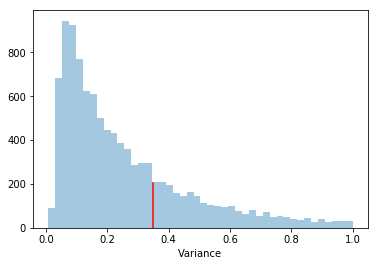

In [72]:
var_df = pd.DataFrame(variance_dict.items(), columns = ['Protein', 'Variance'])
var_df = var_df.dropna()

var_items = var_df['Variance']

filtered = var_items[(var_items >= 0) & (var_items < 1)]

varplot = sns.distplot(filtered, kde=False)
plt.axvline(0.3496826457638, 0,.205, color='red')
#varplot = sns.distplot(var_df['Variance'], kde=False)

### Find min, max, and mean variances

In [8]:
variances = list(var_df['Variance'])
min_var = min(variances)
max_var = max(variances)
avg_var = np.mean(variances)

print("MIN: ", min_var)
print("MAX: ", max_var)
print("MEAN: ", avg_var)

MIN:  0.0075381525
MAX:  9.567272110803323
MEAN:  0.37193493622775325


In [9]:
from statsmodels.stats.power import TTestIndPower

In [10]:
from statsmodels.stats.power import TTestIndPower
analysis = TTestIndPower()
effect_size = analysis.solve_power(nobs1 = 50, power = .8, alpha = .05)
print(effect_size)

0.5658803032224228


In [11]:
# Low, medium, high
variances_low_med_high = [.0075, .37, 9.5]
sd = [0.08682253451, 0.61, 3.08]

detectable_diff = []
for standev in sd:
    detectable_diff.append(standev * effect_size)
    
print(detectable_diff)

[0.04913116215505806, 0.3451869849656779, 1.7429113339250621]


In [12]:
sorted_variances = sorted(variances)
length = len(sorted_variances)
print(length)
div_ten = length/10

dectiles = []
for i in range(0, 10):
    var_to_add = sorted_variances[int(0+(i*div_ten))]
    #print(var_to_add)
    dectiles.append(var_to_add)
#print(sorted_variances[len(sorted_variances)-1])
dectiles.append(sorted_variances[len(sorted_variances)-1])

print(dectiles)

10993
[0.0075381525, 0.05998126378937438, 0.08672422222222222, 0.1164725950610829, 0.1555542610483089, 0.2052603980007838, 0.26546381541039343, 0.3496826457638889, 0.48915157885543986, 0.7982087384544672, 9.567272110803323]


In [13]:
sd_dectiles = []
for vd in dectiles:
    sd_dectiles.append(np.sqrt(vd))

In [14]:
effect_sizes  = []
for i in range(10, 110, 10):
    analysis = TTestIndPower()

    effect_size = analysis.solve_power(nobs1 = i, power = .8, alpha = .05)

    print(effect_size)
    effect_sizes.append(effect_size)

1.3249473806412124
0.9091290568795594
0.7356198424871614
0.6342985155321065
0.5658803032224228
0.5157065039061857
0.47688182584131383
0.4456842248588056
0.4199048125342994
0.39813911739112756


### Determine the measurable difference value for each sample size (10-100) and dectile of variance.

In [15]:
all_vals = []
for i in range(0,len(effect_sizes)):
    effect_size_list = []
    for j in range(0,len(sd_dectiles)):
        effect_size_list.append(round(effect_sizes[i]*sd_dectiles[j], 5))
    all_vals.append(effect_size_list)
        
for es in all_vals:
    print(es)

[0.11504, 0.32449, 0.39018, 0.45218, 0.52256, 0.60028, 0.68266, 0.78349, 0.92666, 1.18374, 4.0982]
[0.07893, 0.22266, 0.26773, 0.31027, 0.35856, 0.41189, 0.46841, 0.5376, 0.63584, 0.81224, 2.81203]
[0.06387, 0.18016, 0.21663, 0.25105, 0.29013, 0.33328, 0.37901, 0.435, 0.51449, 0.65722, 2.27535]
[0.05507, 0.15535, 0.18679, 0.21647, 0.25017, 0.28737, 0.32681, 0.37509, 0.44362, 0.5667, 1.96195]
[0.04913, 0.13859, 0.16665, 0.19312, 0.22319, 0.25638, 0.29156, 0.33463, 0.39577, 0.50557, 1.75032]
[0.04477, 0.1263, 0.15187, 0.176, 0.2034, 0.23364, 0.26571, 0.30496, 0.36068, 0.46075, 1.59513]
[0.0414, 0.11679, 0.14044, 0.16275, 0.18808, 0.21605, 0.2457, 0.282, 0.33353, 0.42606, 1.47504]
[0.0387, 0.10915, 0.13125, 0.1521, 0.17578, 0.20192, 0.22963, 0.26355, 0.31171, 0.39819, 1.37855]
[0.03646, 0.10284, 0.12366, 0.14331, 0.16561, 0.19024, 0.21635, 0.24831, 0.29368, 0.37515, 1.29881]
[0.03457, 0.09751, 0.11725, 0.13588, 0.15703, 0.18038, 0.20513, 0.23544, 0.27846, 0.35571, 1.23148]


In [16]:
formatted = []

for row in all_vals:
    dectiles_row = []
    for entry_index in range(0, len(row)-1):
        dectiles_row.append(str(str(row[entry_index]) + " - " + str(row[entry_index + 1])))
    formatted.append(dectiles_row)
    
for f in formatted:
    print(f)

['0.11504 - 0.32449', '0.32449 - 0.39018', '0.39018 - 0.45218', '0.45218 - 0.52256', '0.52256 - 0.60028', '0.60028 - 0.68266', '0.68266 - 0.78349', '0.78349 - 0.92666', '0.92666 - 1.18374', '1.18374 - 4.0982']
['0.07893 - 0.22266', '0.22266 - 0.26773', '0.26773 - 0.31027', '0.31027 - 0.35856', '0.35856 - 0.41189', '0.41189 - 0.46841', '0.46841 - 0.5376', '0.5376 - 0.63584', '0.63584 - 0.81224', '0.81224 - 2.81203']
['0.06387 - 0.18016', '0.18016 - 0.21663', '0.21663 - 0.25105', '0.25105 - 0.29013', '0.29013 - 0.33328', '0.33328 - 0.37901', '0.37901 - 0.435', '0.435 - 0.51449', '0.51449 - 0.65722', '0.65722 - 2.27535']
['0.05507 - 0.15535', '0.15535 - 0.18679', '0.18679 - 0.21647', '0.21647 - 0.25017', '0.25017 - 0.28737', '0.28737 - 0.32681', '0.32681 - 0.37509', '0.37509 - 0.44362', '0.44362 - 0.5667', '0.5667 - 1.96195']
['0.04913 - 0.13859', '0.13859 - 0.16665', '0.16665 - 0.19312', '0.19312 - 0.22319', '0.22319 - 0.25638', '0.25638 - 0.29156', '0.29156 - 0.33463', '0.33463 - 0.3957

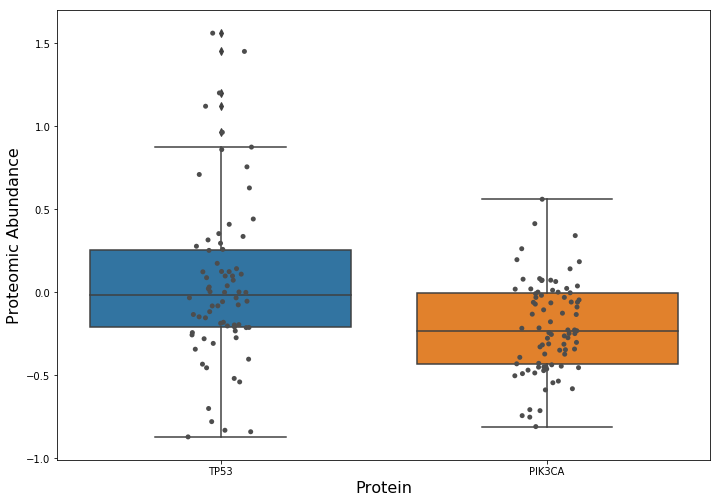

In [46]:
tp53_prot = endometrioid_df['TP53_proteomics']
pik3ca_prot = endometrioid_df['PIK3CA_proteomics']

plot_df1 = pd.DataFrame()
plot_df1['proteomic abundance'] = tp53_prot
plot_df1['protein'] = 'TP53'

plot_df2 = pd.DataFrame()
plot_df2['proteomic abundance'] = pik3ca_prot
plot_df2['protein'] = 'PIK3CA'

plot_df = pd.concat([plot_df1, plot_df2])

#print(tp53_prot)
#print("______")
#print(pik3ca_prot)

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = plot_df, y = 'proteomic abundance',x='protein', ax = ax)
boxplt = sns.stripplot(data = plot_df, y = 'proteomic abundance', x = 'protein', jitter = True, color = '.3')

ax.set_xlabel('Protein',fontsize=16)
ax.set_ylabel('Proteomic Abundance',fontsize=16)
#ax.plot(label='big')

#boxplt.set_title("Effect of " + gene + " mutation on SPRY1 proteomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

In [33]:
plot_df

,proteomic levels,protein
Sample_ID,,
S001,0.295000,TP53
S002,0.277000,TP53
S003,-0.871000,TP53
S005,-0.343000,TP53
S007,-0.148000,TP53
S008,0.441000,TP53
S010,-0.082500,TP53
S011,-0.181000,TP53
S012,-0.000425,TP53


In [47]:
from statsmodels.stats.power import TTestIndPower
analysis = TTestIndPower()
effect_size = analysis.solve_power(nobs1 = 50, power = .8, alpha = .05)

variance_of_mean_protein = 0.372
sd_of_mean_protein = np.sqrt(variance_of_mean_protein)

detectable_difference = effect_size * sd_of_mean_protein

print(detectable_difference)

0.34514059821750565


STAT:  -7.285084700973401
PVAL:  1.0250180625304501e-10


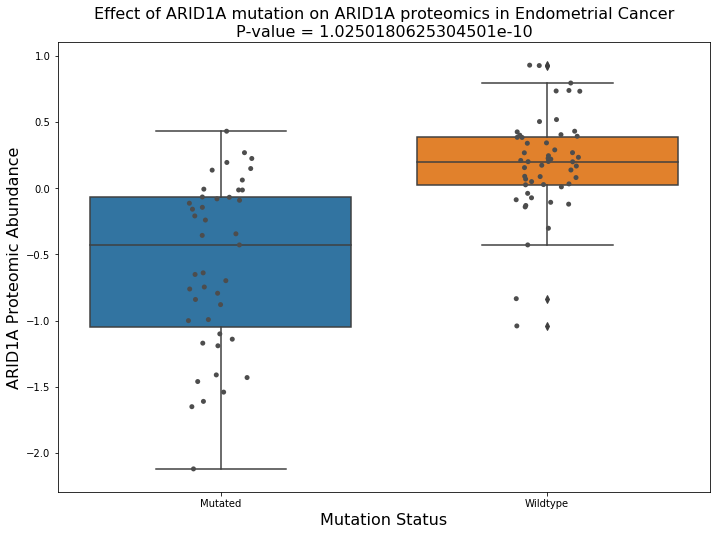

In [89]:
arid_df = en.join_omics_to_mutations(omics_df_name='proteomics', omics_genes='ARID1A', mutations_genes=['ARID1A'])
arid_df = arid_df.loc[arid_df['Sample_Status'] == 'Tumor']

for ind, row in arid_df.iterrows():
    if 'mutation' in row['ARID1A_Mutation_Status']:
        arid_df.at[ind,'Mutated'] = 'Mutated'
    else:
        arid_df.at[ind,'Mutated'] = 'Wildtype'
        
mutated = arid_df.loc[arid_df['Mutated'] == 'Mutated']
wt = arid_df.loc[arid_df['Mutated'] == 'Wildtype']

stat, pval  = scipy.stats.ttest_ind(mutated['ARID1A_proteomics'], wt['ARID1A_proteomics'])
print("STAT: ", stat)
print("PVAL: ", pval)

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = arid_df, y = 'ARID1A_proteomics',x='Mutated', ax = ax)
boxplt = sns.stripplot(data = arid_df, y = 'ARID1A_proteomics', x = 'Mutated', jitter = True, color = '.3')

boxplt.set_title("Effect of " + "ARID1A" + " mutation on ARID1A proteomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

ax.set_xlabel('Mutation Status',fontsize=16)
ax.set_ylabel('ARID1A Proteomic Abundance',fontsize=16)

plt.show()

In [90]:
mean1 = np.mean(mutated['ARID1A_proteomics'])
mean2 = np.mean(wt['ARID1A_proteomics'])

print(mean2-mean1)

0.7618441234347049
